## Loading the necessary libraries

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading the data

In [9]:
df = pd.read_csv('../data/creditcard.csv')

In [10]:
df.shape

(284807, 31)

In [11]:
df.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93517,64461.0,-0.475252,1.077897,1.694995,-0.014778,0.039686,-0.595343,0.690942,0.000423,-0.557339,-0.381751,0.267572,0.622563,0.854453,0.010644,0.977116,-0.231807,-0.04746,-1.019003,-0.473305,0.108689,-0.169513,-0.346227,0.03331,0.405819,-0.280665,0.077715,0.28867,0.122698,1.29,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

It can be seen that the data is very clean with no NaN's. 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


The mean value of the class variable being extremely low (1e-3) suggests that most of the transactions are not fraudulent. This is to be expected in credit card data where the positives are generally a lot lesser in quantity than the negatives. We can verify this by using value_counts on the data to find the exact number of positive and negative data points. 

In [16]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This verifies what was already apparent from the describe function, which showed that the number of negative examples far exceeded the number of positive examples. This suggests that specific methods such as SMOTE or class-balanced weights will have to be used. 

## Visualisations

### Visualisation of class frequencies

In [18]:
class_weights = df['Class'].value_counts().reset_index()
class_weights

,Class,count
0,0,284315
1,1,492


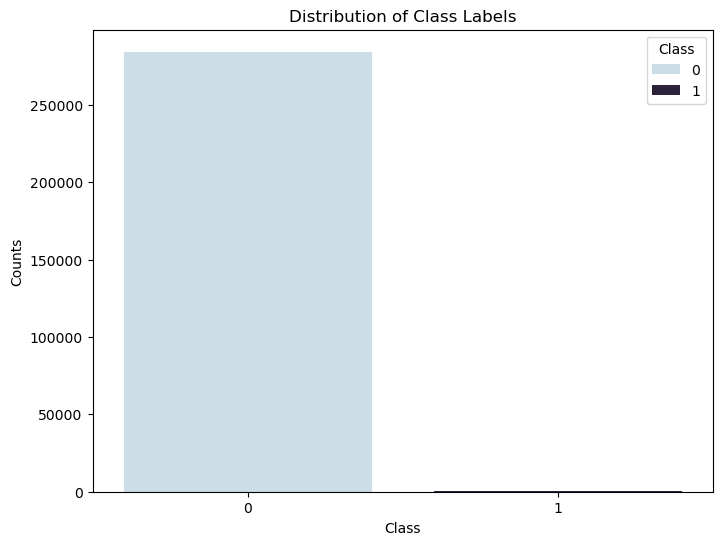

In [19]:
plt.figure(figsize = (8,6))
sns.barplot(data = class_weights, x = 'Class', y = 'count', hue ='Class', palette = "ch:s=.25,rot=-.25")
plt.title('Distribution of Class Labels')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.show()

Now let us see if there is a noticeable difference in the transaction amounts between fraudulent and legitimate payments. We can use a visualisation to compare the mean transaction amounts for both classes. 

   Class      Amount
0      0   88.291022
1      1  122.211321


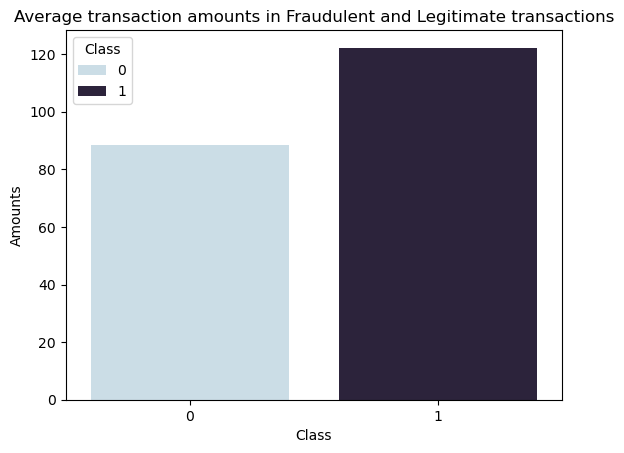

In [26]:
average_spends = df.groupby(['Class'])['Amount'].mean().reset_index()
print(average_spends)

sns.barplot(data = average_spends, x = 'Class', y = 'Amount', hue ='Class', palette = "ch:s=.25,rot=-.25")
plt.title('Average transaction amounts in Fraudulent and Legitimate transactions')
plt.xlabel('Class')
plt.ylabel('Amounts')
plt.show()

We see that the mean transaction amount for a fraudulent transaction is higher than that of a legitimate transaction. However, since the number of fraudulent transactions is so few in the dataset, a single large transaction could skew the mean a large amount. Thus, we will also compare the median transaction amounts of both classes as well.

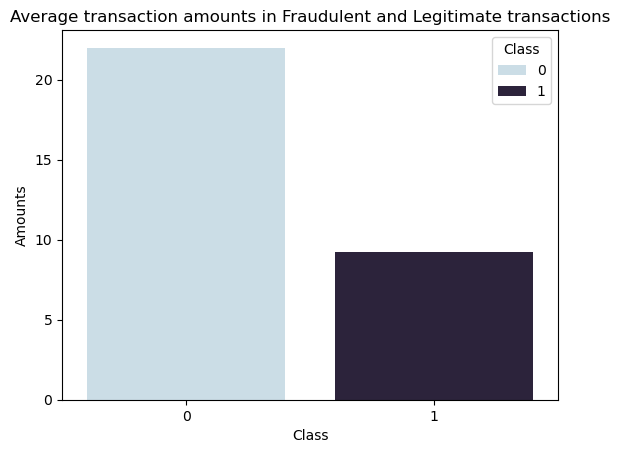

In [27]:
median_spends = df.groupby(['Class'])['Amount'].median().reset_index()

sns.barplot(data = median_spends, x = 'Class', y = 'Amount', hue ='Class', palette = "ch:s=.25,rot=-.25")
plt.title('Average transaction amounts in Fraudulent and Legitimate transactions')
plt.xlabel('Class')
plt.ylabel('Amounts')
plt.show()

The higher mean for fraudulent transactions is driven by a small sample size and a few outliers with unusually high transaction amounts. The median provides a more reliable measure of the typical fraudulent transaction, as it's less sensitive to these extreme values.

### Correlations between variables and the target variable. 

Since making a 31x31 matrix will take up a lot of space and border on not being understandable, we shall use another visualisation method to check for the correlations of all the variables with the target variable

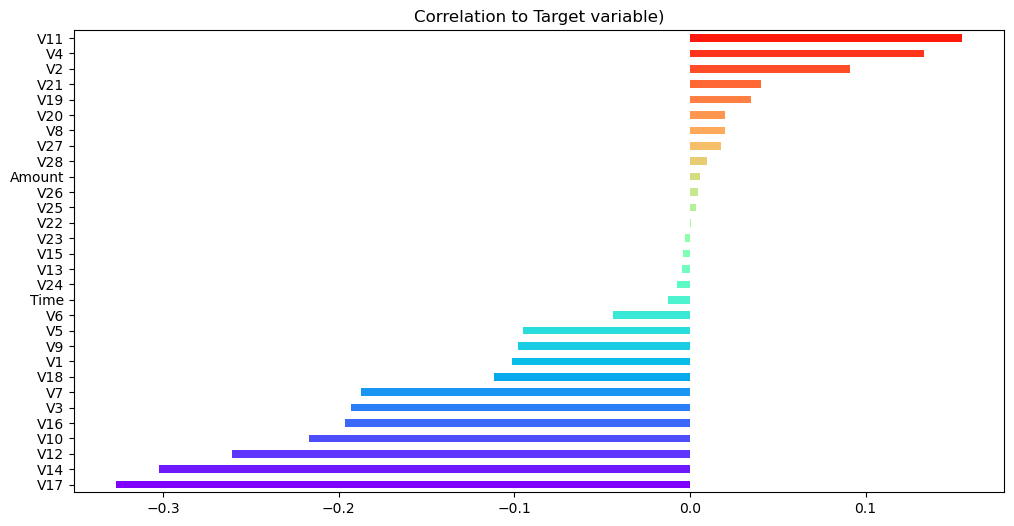


 V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
dtype: float64


In [32]:
plt.figure(figsize= (14,8))
n_fts = len(df.columns)
colors = cm.rainbow(np.linspace(0, 1, n_fts))

df.drop(['Class'],axis=1).corrwith(df.Class).sort_values(ascending=True).plot(kind='barh',
                                                                                     color=colors, figsize=(12, 6))
plt.title('Correlation to Target variable)')
plt.show()

print('\n',df.drop(['Class'],axis=1).corrwith(df.Class).sort_values(ascending=False))

This shows that there are quite a few variables that show correlation with the target variable. Notably, V11, V4, V2 have a slight positive correlation with the target while V18, V7, V3, V16, V10, V12, V14, V17 have a substantial negative correlation with the Class variable. Now, in addition to this, we can also look at the histograms of the transaction amounts for both legitimate transaction and fraudulent ones

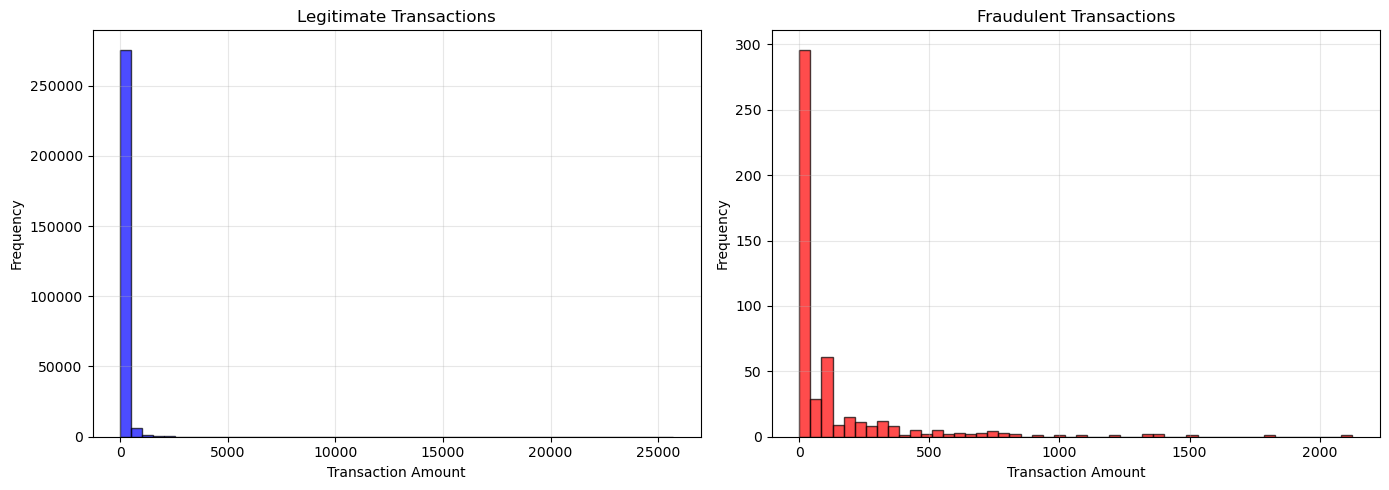

In [34]:
legitimate = df[df['Class'] == 0]['Amount']
fraud = df[df['Class'] == 1]['Amount']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(legitimate, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Legitimate Transactions')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

axes[1].hist(fraud, bins=50, color='red', alpha=0.7, edgecolor='black')
axes[1].set_title('Fraudulent Transactions')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_ylabel('Frequency')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Undersampling to check the correlation matrix

Using the original imbalanced dataset would not work for getting a descriptive correlation matrix. This is because of the massive imbalance present in the dataset. In order to rectify this we will first undersample the majority class to the same number of observations as the minority class. This will be done after shuffling the dataset. There are only 492 minority class samples and thus we will undersample to only have 492 samples of the negative class as well. 

In [35]:
df = df.sample(frac= 1)

In [39]:
df_fraud = df.loc[df['Class'] == 1]
df_non_fraud = df.loc[df['Class'] == 0][:492]
equal_df = pd.concat([df_fraud, df_non_fraud])

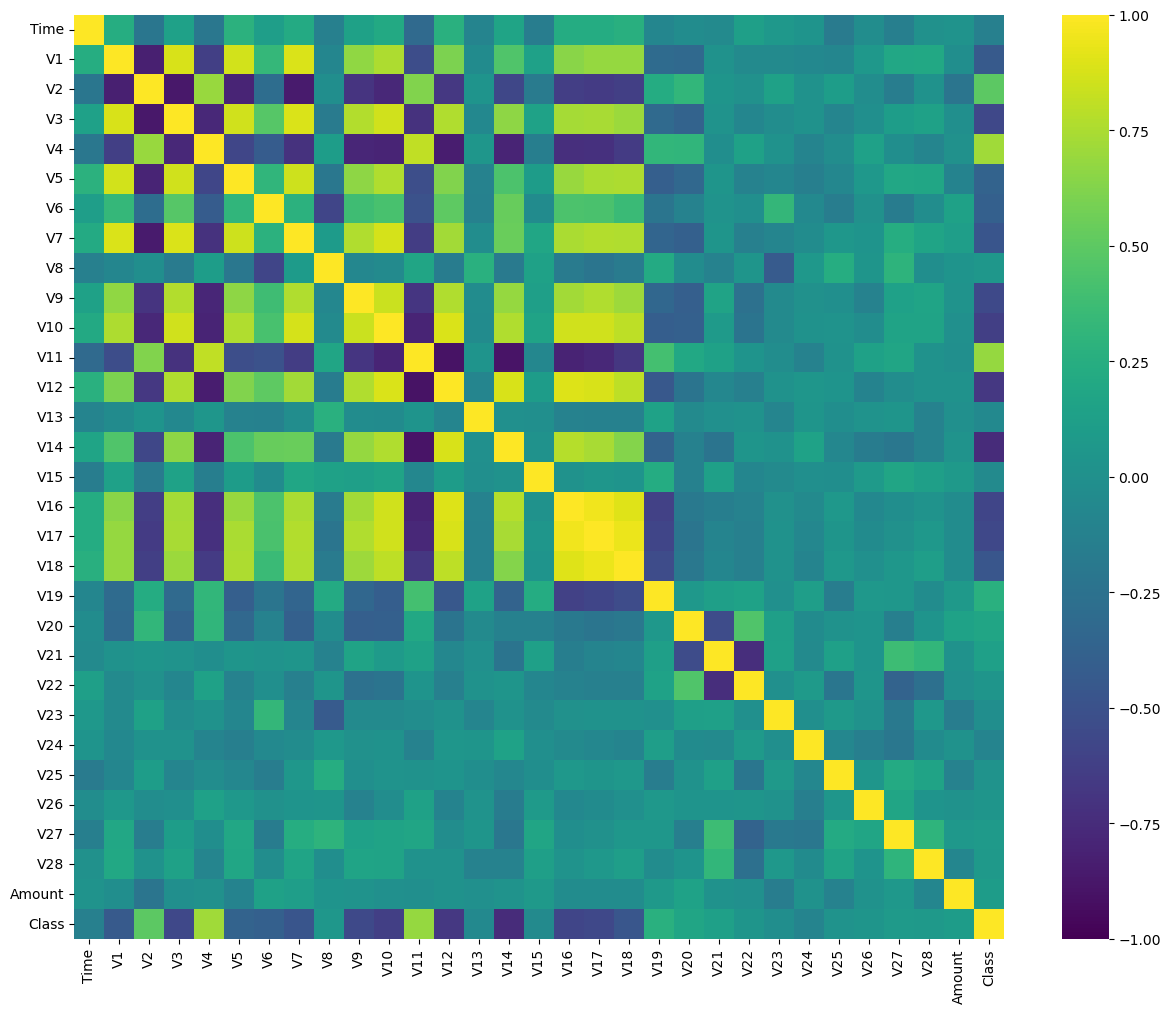

In [43]:
corr_matrix = equal_df.corr()
plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, cmap = 'viridis')
plt.show()

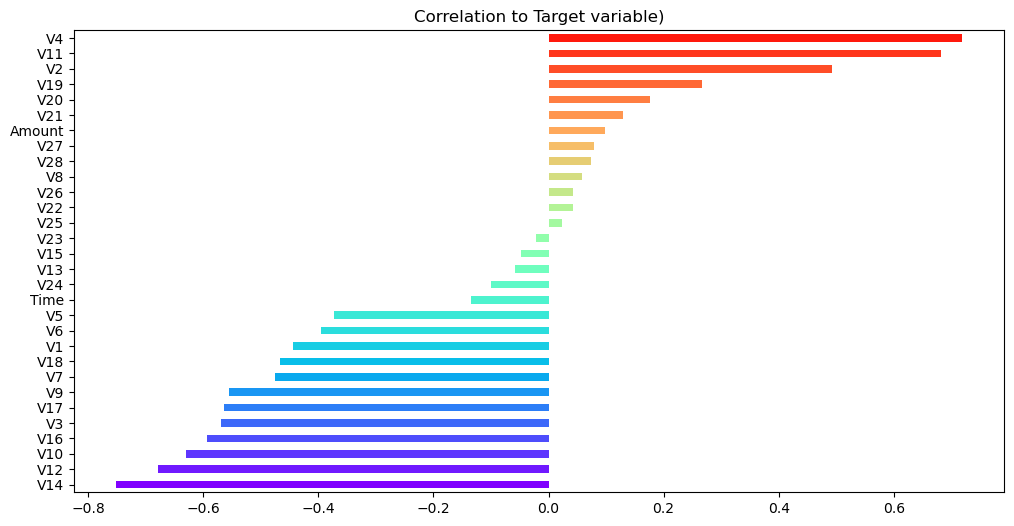

In [45]:
plt.figure(figsize= (14,8))
n_fts = len(equal_df.columns)
colors = cm.rainbow(np.linspace(0, 1, n_fts))

equal_df.drop(['Class'],axis=1).corrwith(equal_df.Class).sort_values(ascending=True).plot(kind='barh',
                                                                                     color=colors, figsize=(12, 6))
plt.title('Correlation to Target variable)')
plt.show()

We see that there are a few variables that have exceedingly high correlations with our target variable. These include V4, V11, V2 with positive correlation as well as V14, V12, V10, V16, V3, V17, and V9 with a large negative correlation with the target variable.

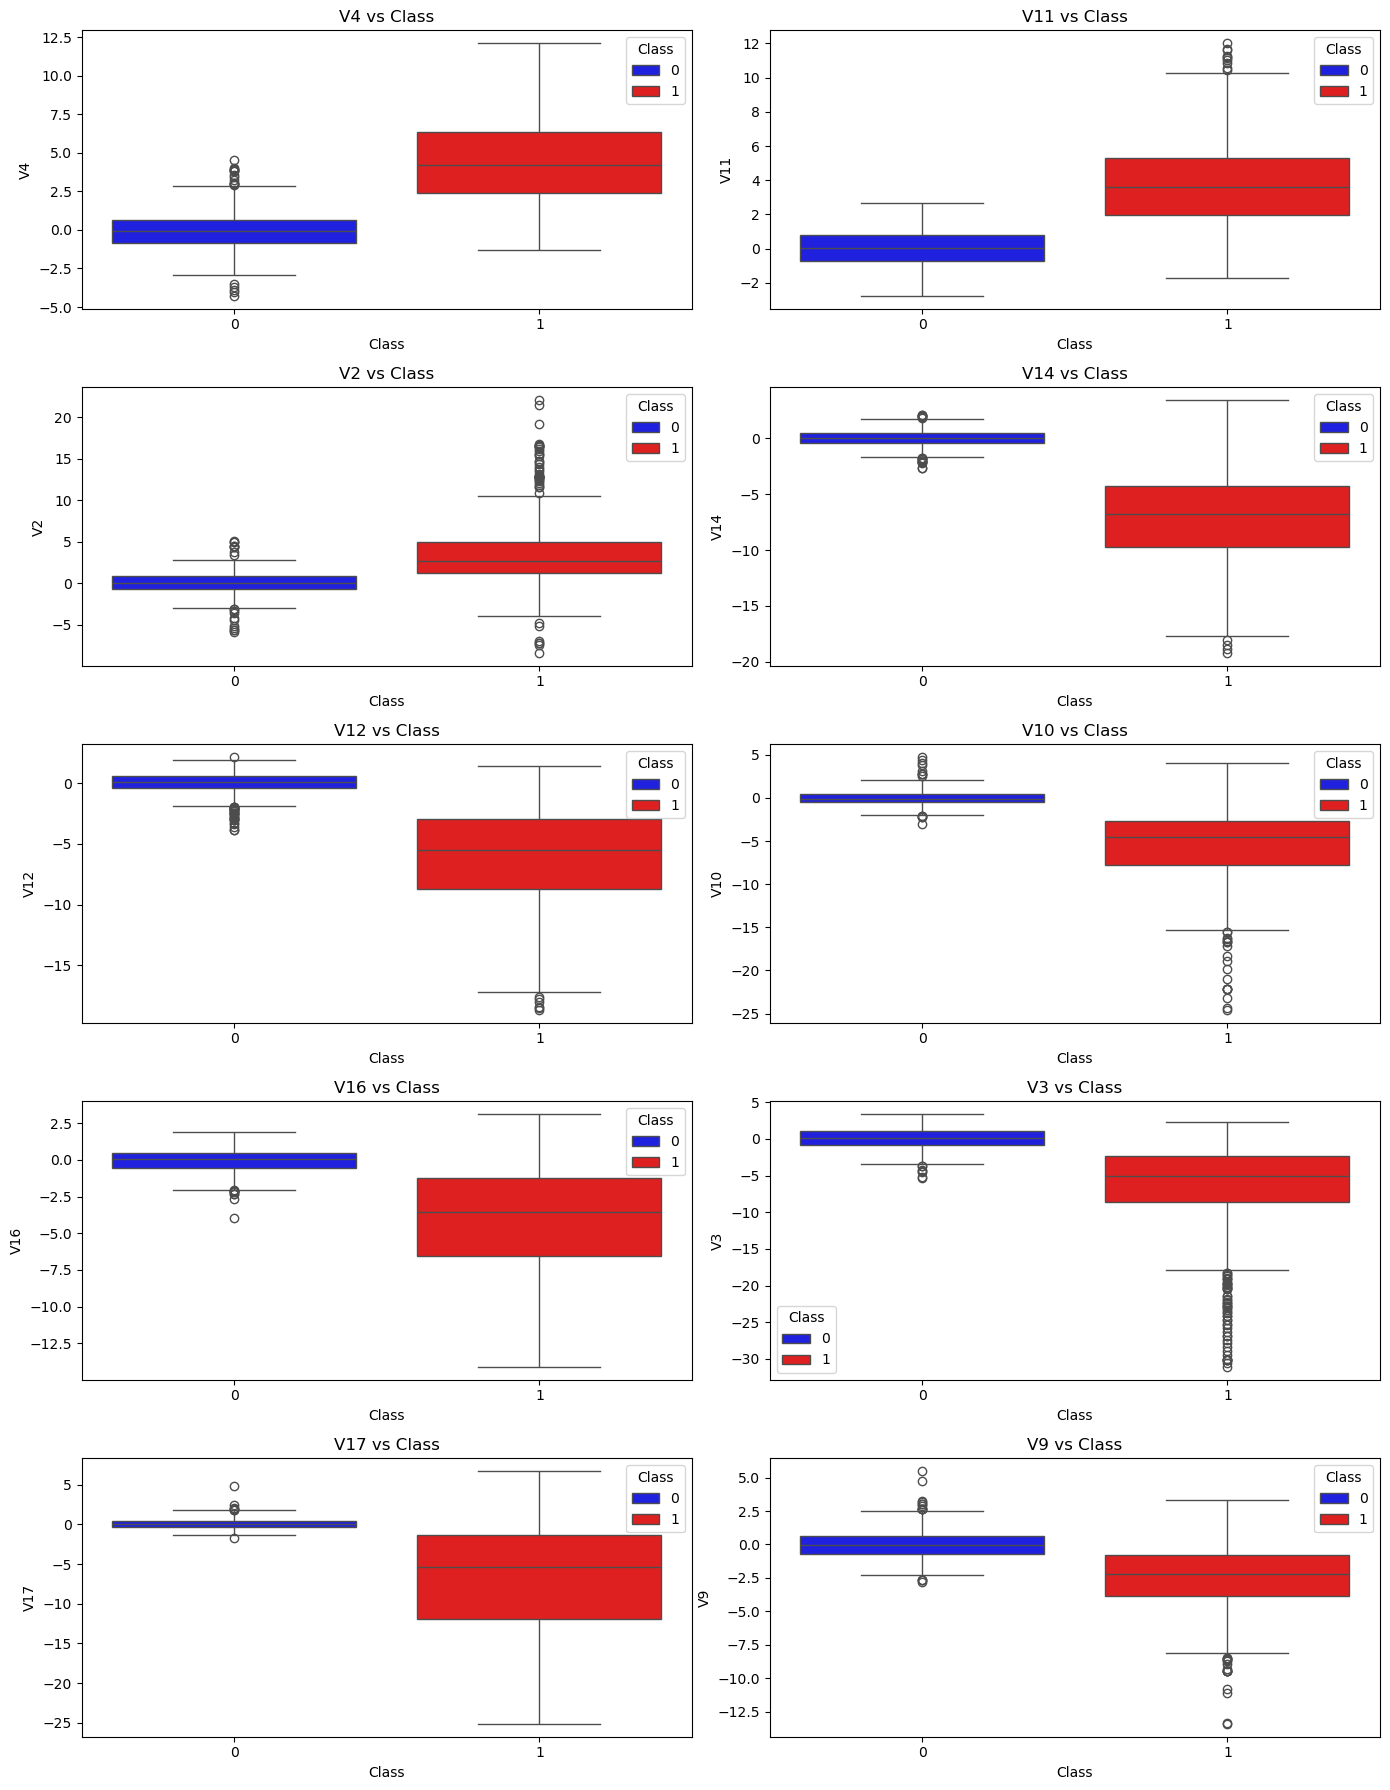

In [48]:
# Variables to plot
high_corr_vars = ['V4', 'V11', 'V2', 'V14', 'V12', 'V10', 'V16', 'V3', 'V17', 'V9']

# Colors
colors = ['blue', 'red']

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(14, 18))
axes = axes.ravel()

for i, var in enumerate(high_corr_vars):
    sns.boxplot(x="Class", y=var, data=equal_df, hue = 'Class', palette=colors, ax=axes[i])
    axes[i].set_title(f'{var} vs Class')

plt.tight_layout()
plt.show()
